In [1]:
from oir_backend.oir import OIR
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import math
from model.image import Image
import matplotlib
import oir_backend.oir
from importlib import reload
import utils
reload(oir_backend.oir)

<module 'oir_backend.oir' from 'c:\\Users\\oookk\\Google Drive\\Studia\\CV\\gameskan\\src\\oir_backend\\oir.py'>

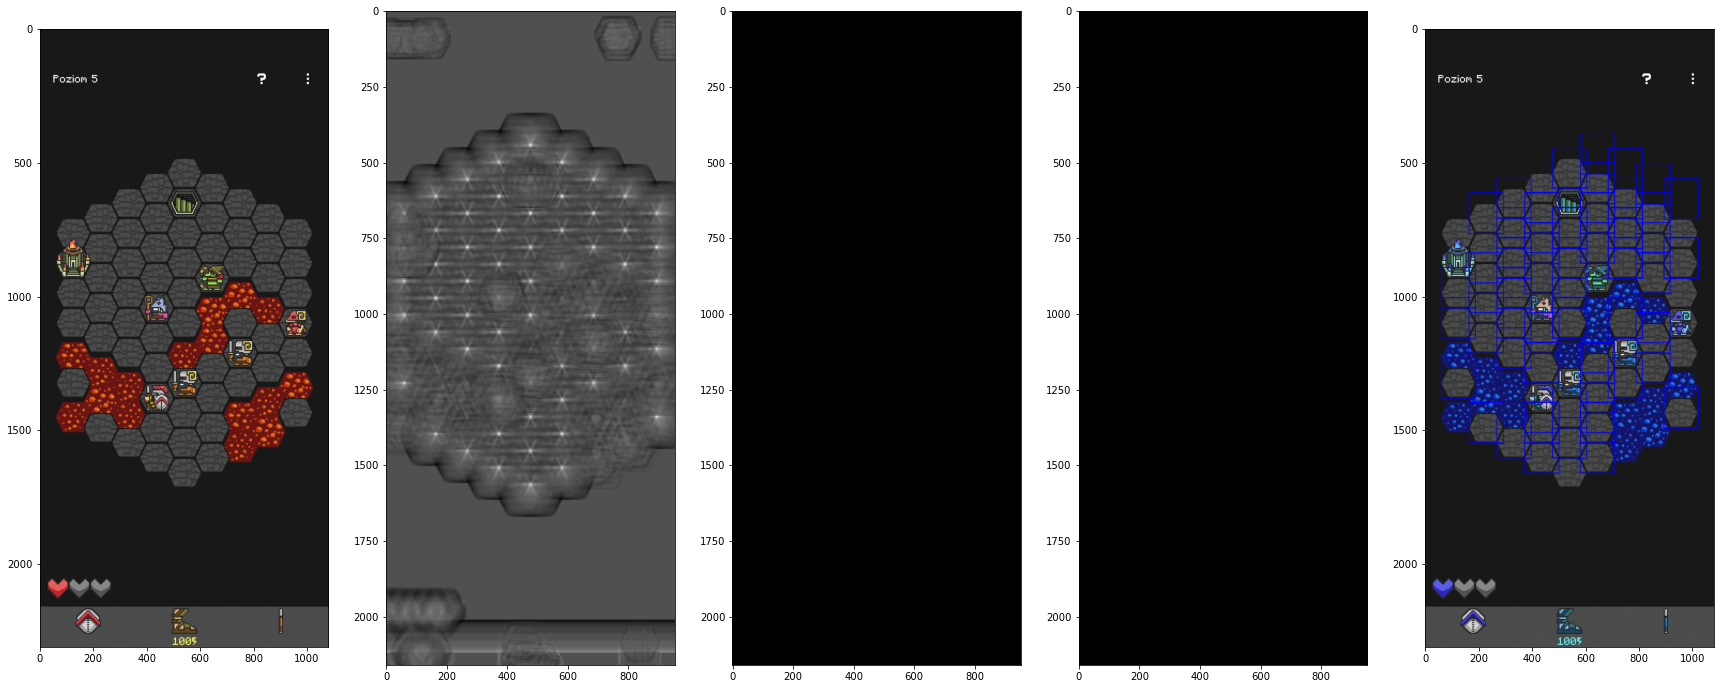

In [2]:
matplotlib.rcParams['figure.figsize'] = (30, 15)

base = cv.imread('../screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')
asset = cv.imread('../assets/tile_floor.1.png', cv.IMREAD_UNCHANGED)
# asset = cv.bitwise_or(asset,asset,mask = asset[:,:,3])
basee = cv.imread('../screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')

asset = utils.scale_image(asset, 4)
thresh = asset.shape[0]/2
asset = Image.fromCV(asset)

oir = oir_backend.oir.OIR()
bounds = oir.match_asset(Image.fromCV(base), asset.cvImage, threshold=1.2)

for b1, b2 in zip(bounds[:-1],bounds[1:]):
    p1 = b1.center
    p2 = b2.center

    dist = math.sqrt( (p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 )

    if dist > thresh:
        basee = cv.rectangle(basee, (b1.box_x, b1.box_y), (b1.box_x_len, b1.box_y_len), (0, 0, 255), 2)

plt.imshow(basee)